## Convolutional Nerual Network to classify jellyfish vs plastic

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers, models

(790, 100, 100, 3)


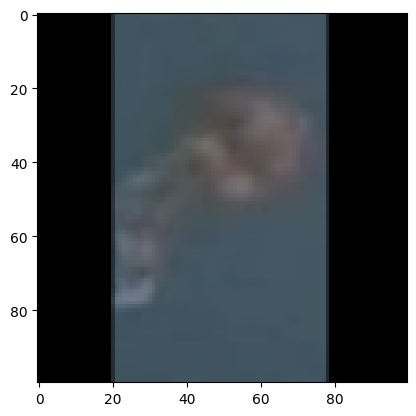

In [3]:
# data
x1 = list(np.load('jellyfish_images.npy'))
x2 = list(np.load('plastic_images.npy'))
y1 = list(np.load('jellyfish_labels.npy'))
y2 = list(np.load('plastic_labels.npy'))

y1 = [False] * len(y1) #jellyfish
y2 = [True] * len(y2) #plastic

X = []
Y = []
for i in range(len(x1)-1):
    X.append(x1[i])
    Y.append(y1[i])
for j in range(len(x2)-1):
    X.append(x2[j])
    Y.append(y2[j])
X = np.array(X)
Y = np.array(Y)

# train test split the data
seed = 10
train_images, test_images, train_labels, test_labels = train_test_split(
    X, 
    Y, 
    test_size = 0.33, 
    random_state = seed)
plt.imshow(X[0])
print(train_images.shape)

In [17]:
# constructing the model
num_classes = 2
img_height = 100
img_width = 100
img_depth = 3

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  img_depth)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, img_depth)), #rescale RGB values to (0,1)
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(img_height, img_width, img_depth)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

# summary of the model constructed
model.summary()

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model
epochs=100
history = model.fit(
    train_images, 
    train_labels, 
    epochs=100, 
    validation_data=(test_images, test_labels)
)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                 

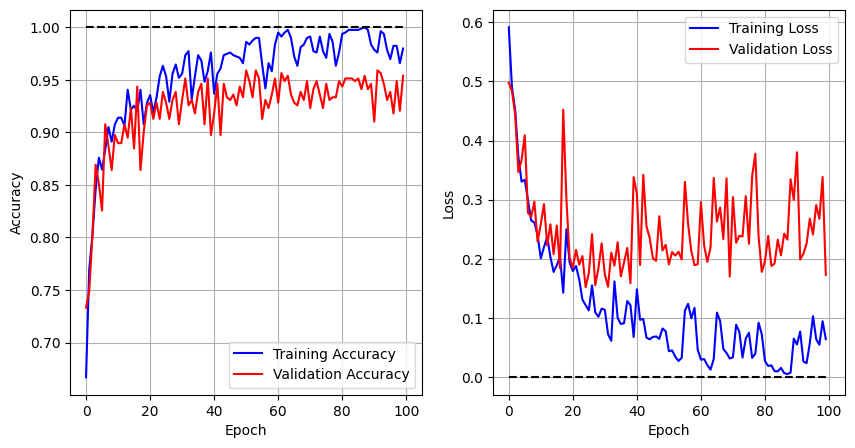

In [18]:
# plots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(history.history['accuracy'], label='Training Accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy',color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.hlines(y=1.0,xmin=0,xmax=epochs,linestyle='--',color='black')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.grid()
plt.plot(history.history['loss'], label='Training Loss',color='blue')
plt.plot(history.history['val_loss'], label = 'Validation Loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.hlines(y=0,xmin=0,xmax=epochs,linestyle='--',color='black')
plt.legend(loc='best')
plt.show()

[1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0]
13/13 - 3s - loss: 0.1728 - accuracy: 0.9538 - 3s/epoch - 268ms/step
0.17280803620815277 0.9538461565971375
[9.3241169e-07 9.9999905e-01]


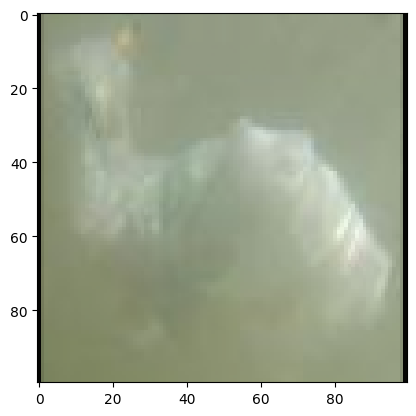

[1.0000000e+00 1.9982416e-09]


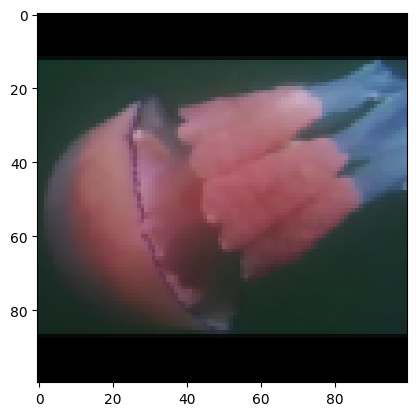

[9.9999380e-01 6.1974506e-06]


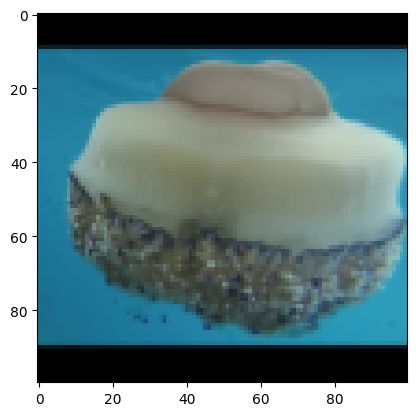

[1.0000000e+00 1.7698014e-08]


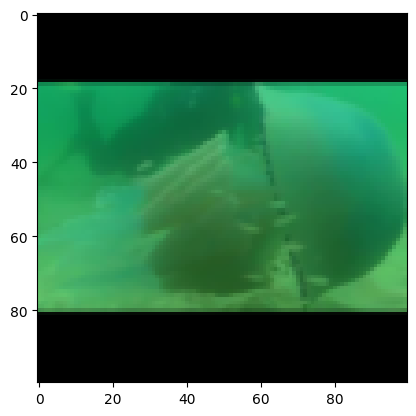

[5.457929e-04 9.994542e-01]


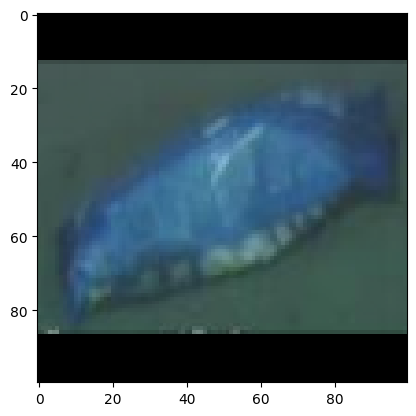

[8.8411337e-04 9.9911588e-01]


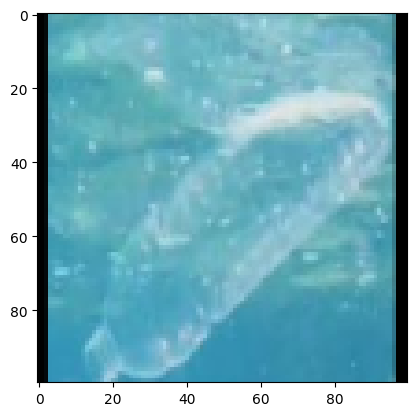

[0.00385708 0.9961429 ]


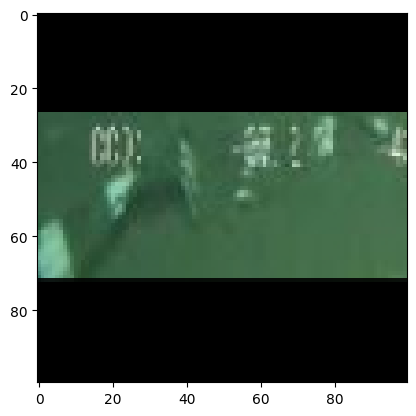

[6.7352416e-04 9.9932647e-01]


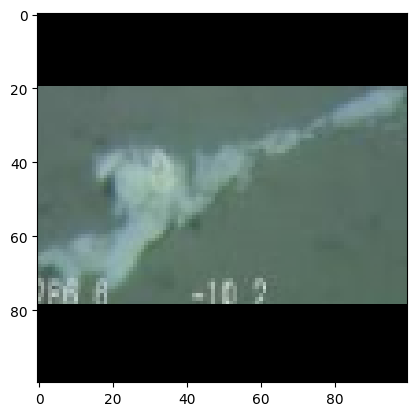

[7.923654e-08 9.999999e-01]


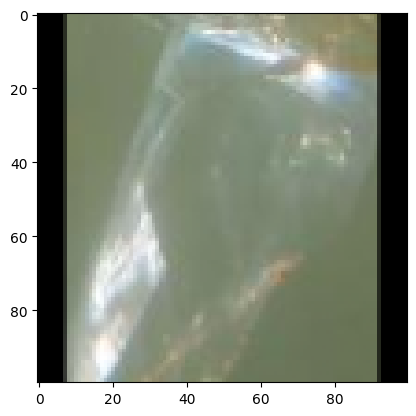

[0.03684015 0.96315986]


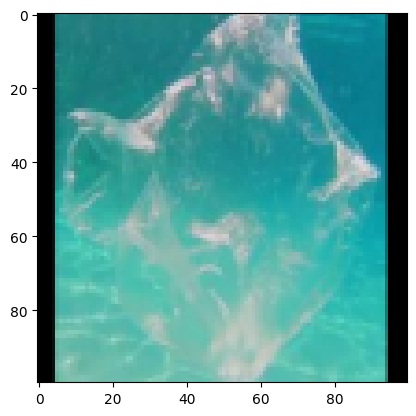

[9.9999964e-01 3.2088622e-07]


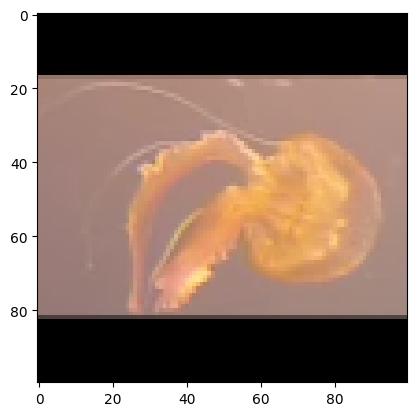

[2.6803662e-06 9.9999738e-01]


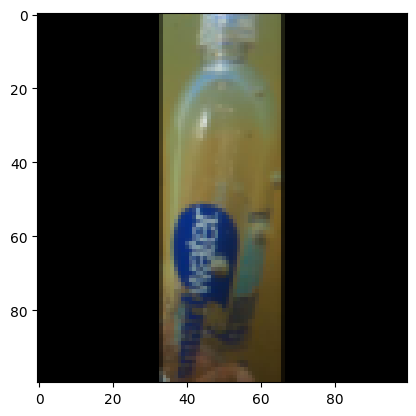

[1.0000000e+00 1.9575738e-10]


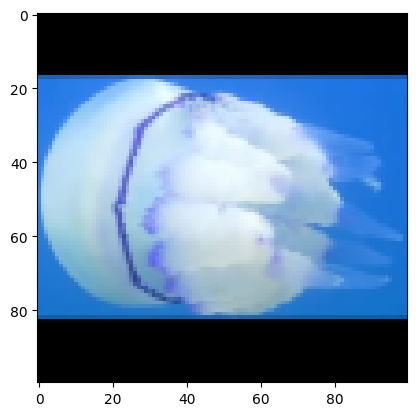

[5.0247673e-09 1.0000000e+00]


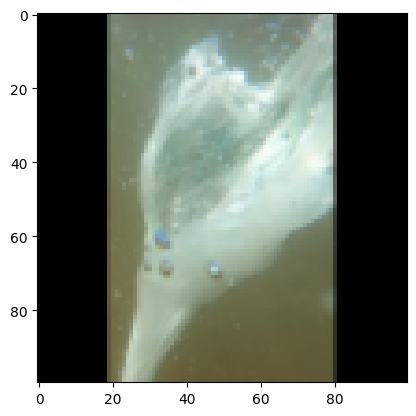

[9.9989653e-01 1.0341809e-04]


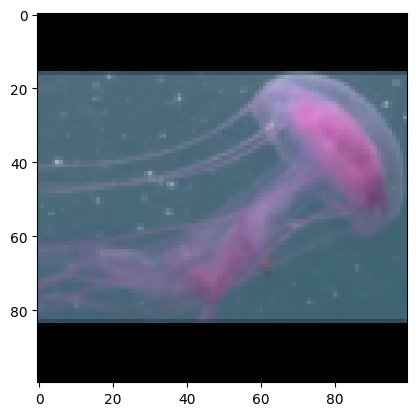

[1.350659e-05 9.999865e-01]


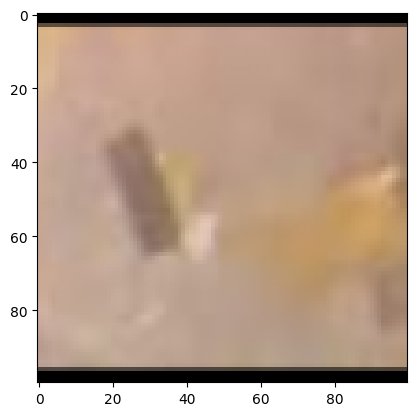

[5.3069612e-05 9.9994695e-01]


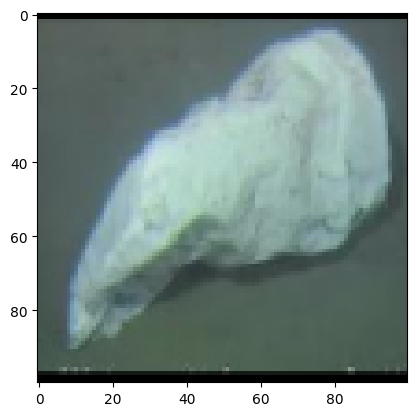

[0.7933201  0.20667993]


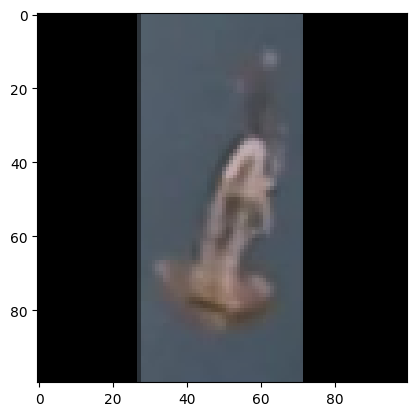

[3.6758747e-06 9.9999630e-01]


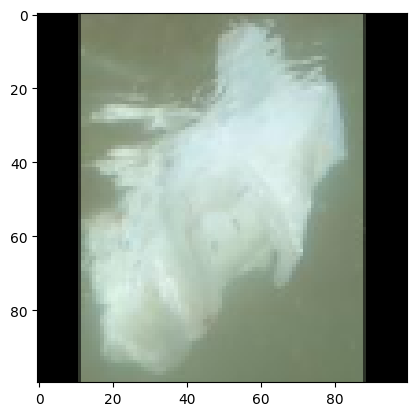

[9.995727e-01 4.272877e-04]


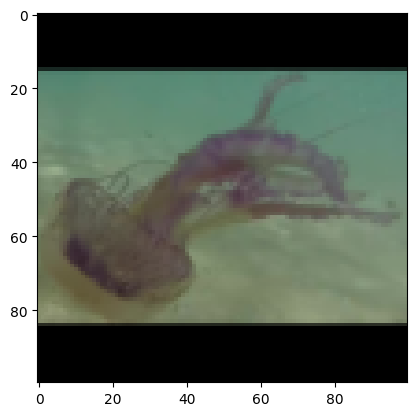

[2.9136975e-09 1.0000000e+00]


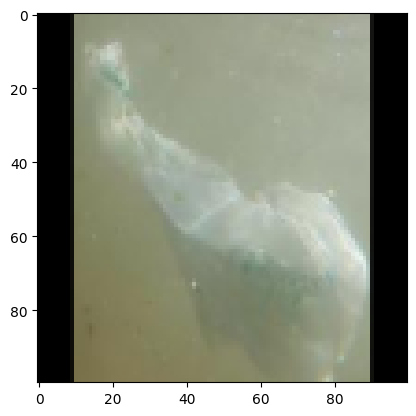

[9.9998569e-01 1.4247735e-05]


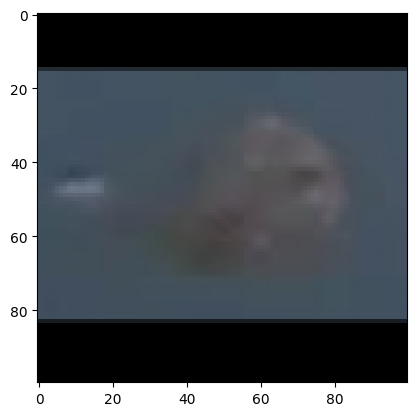

[9.9926192e-01 7.3802995e-04]


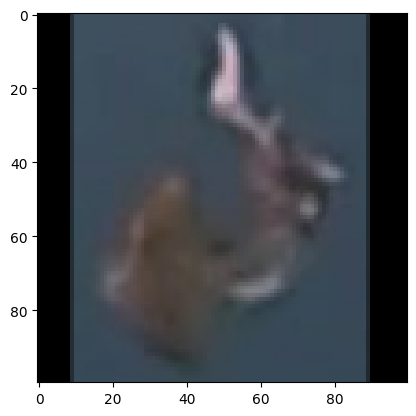

[0.21205373 0.7879462 ]


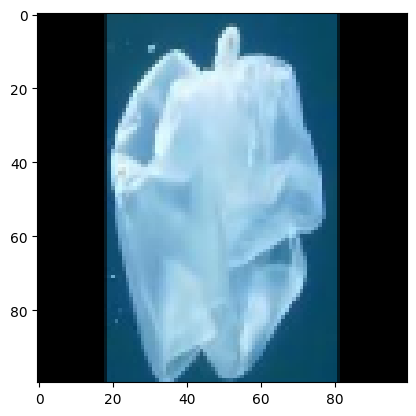

[1.0000000e+00 9.8164735e-14]


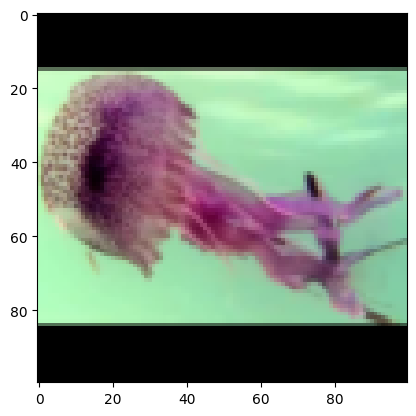

[1.000000e+00 4.401186e-12]


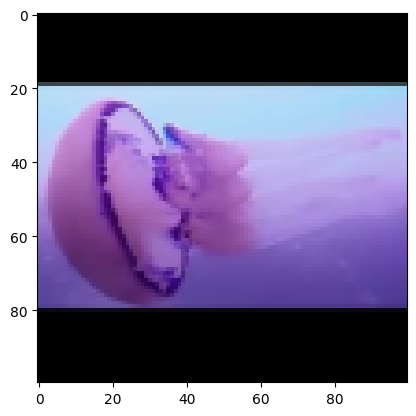

[0.01062264 0.9893773 ]


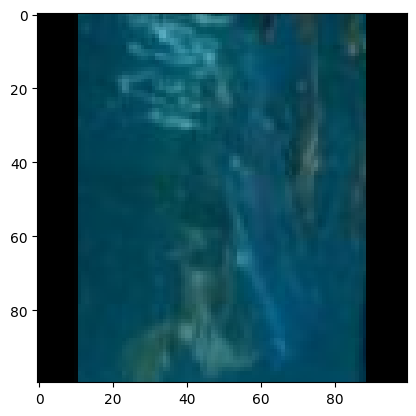

[0.41593263 0.58406734]


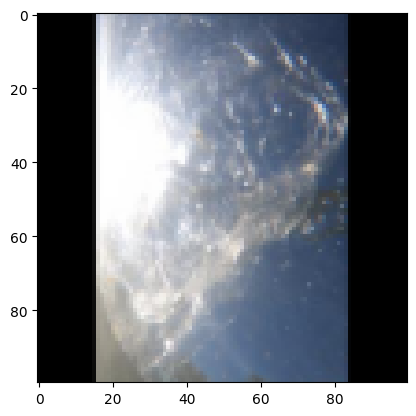

[9.9999928e-01 7.3825305e-07]


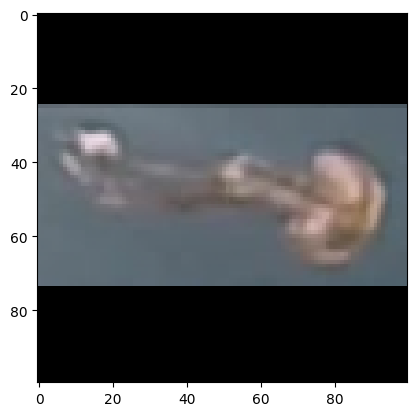

[1.0000000e+00 3.0009117e-13]


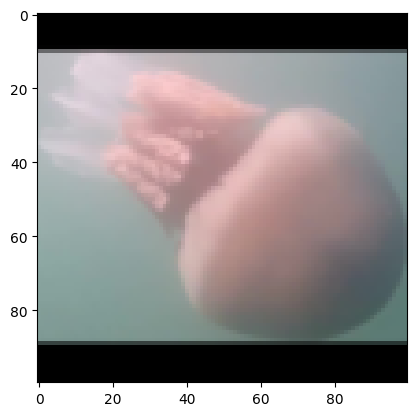

[7.1425975e-04 9.9928576e-01]


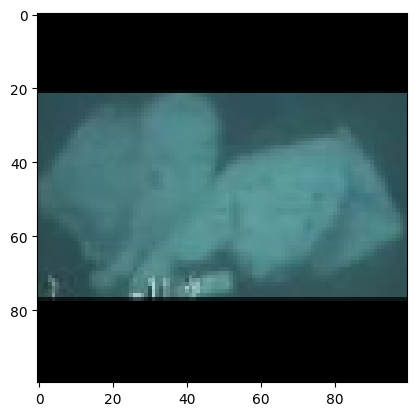

[9.9940646e-01 5.9356279e-04]


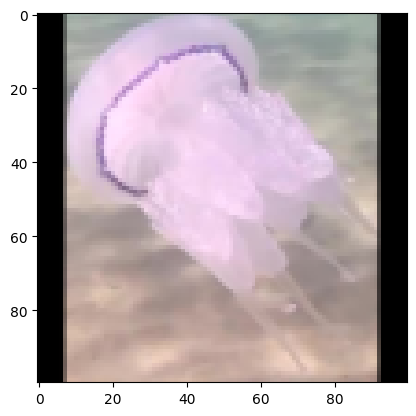

[1.0000000e+00 7.6923634e-11]


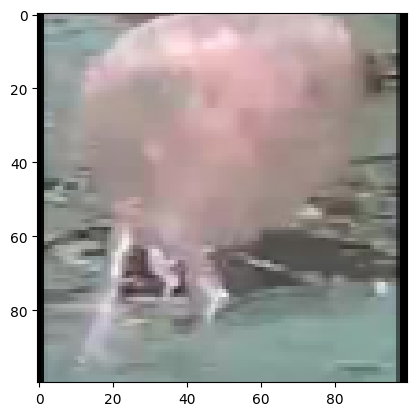

[0.9988261 0.0011739]


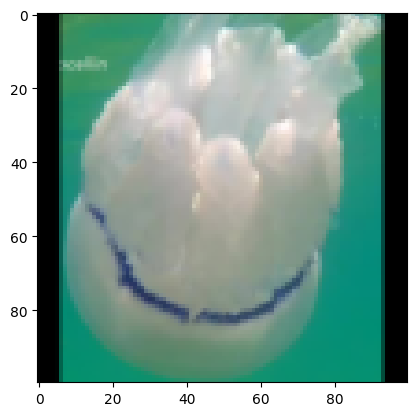

[9.999994e-01 5.714879e-07]


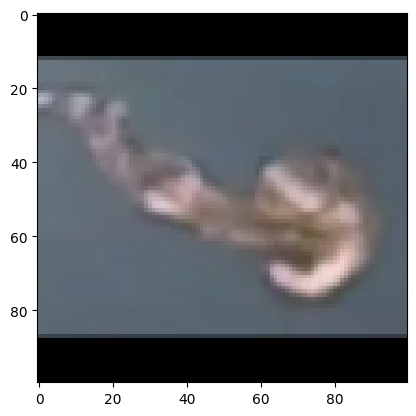

[1.5121442e-04 9.9984872e-01]


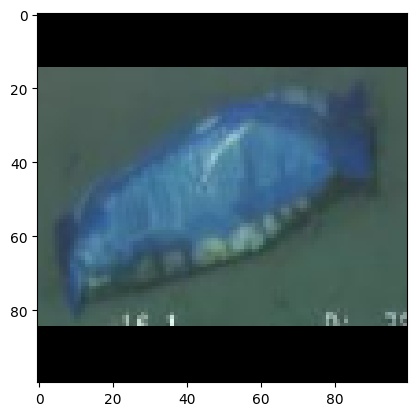

[9.9999690e-01 3.1171573e-06]


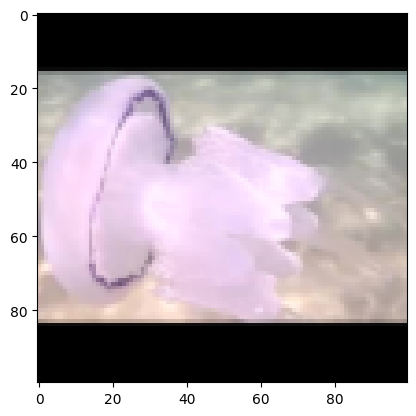

[9.9999833e-01 1.6679905e-06]


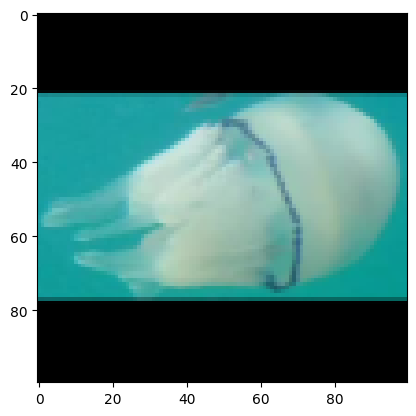

[1.0000000e+00 3.6303573e-12]


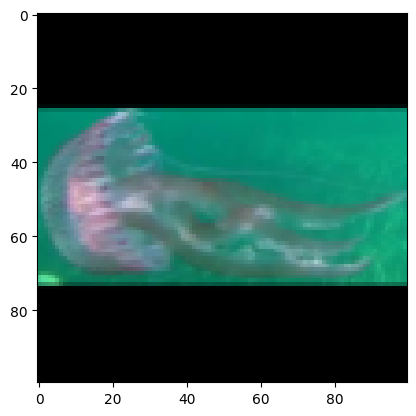

[1.4420625e-21 1.0000000e+00]


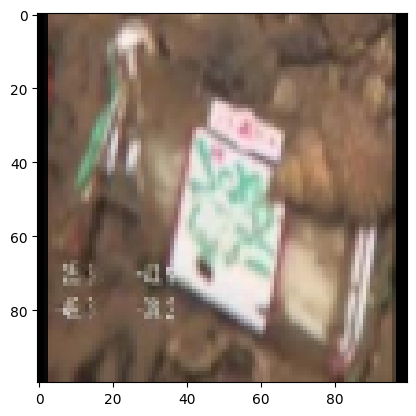

In [33]:
# model evaluation
probability_model = models.Sequential([model, tf.keras.layers.Softmax()])
predicts = probability_model.predict_on_batch(test_images)

predicts_label = np.where(predicts[:,1] > 0.5, 1, 0)
print(predicts_label)
# print(classification_report(test_labels, predicts))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_loss,test_acc)

for i in range(0,40):
    num_pic = i+40
    plt.imshow(test_images[num_pic])
    print(predicts[num_pic])
    plt.show()




In [12]:
model.save('zfg_1.h5')

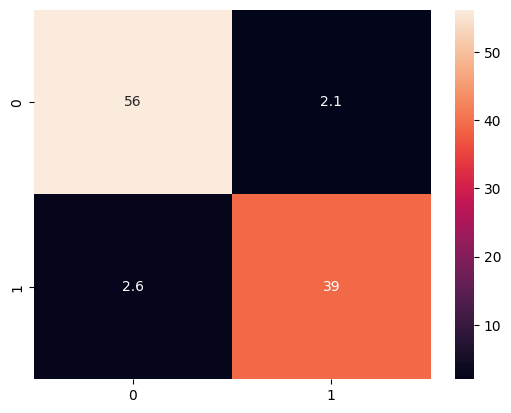

In [32]:
var = tf.math.confusion_matrix(
    test_labels,
    predicts_label,
    num_classes=2,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

import seaborn as sb
var = var/np.sum(var) * 100
sb.heatmap(var,annot=True)
plt.show()